# MAIN NOTEBOOK
In this notebook, we begin to perform analyses on the previously processed datasets.
The initial BeerAdvocate and Ratebeer datasets were modified as follows:
- Removal of duplicates
- Adjustment and correction of location formatting
- Consistency check on data types for each column
- Removal of beers that had nbr_ratings==0 and nbr_reviews==0 (in particular, this filtering removes a few beers from the dataset, but these have no relative rating, so are not useful for the type of analysis we are interested in doing)

In [67]:
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scr.utils as utils
importlib.reload(utils)


<module 'scr.utils' from 'C:\\Users\\chiar\\OneDrive\\Documenti\\EPFL-DH\\Applied_Data_Analysis\\P2\\ada-2024-project-mediterranean\\scr\\utils.py'>

In [8]:
original_PATH = 'data/Original'
processed_PATH = 'data/Processed'

In [9]:
# Loading Data non-processed
beer_ba = pd.read_csv(original_PATH + '/BeerAdvocate/beers.csv')
breweries_ba = pd.read_csv(original_PATH + '/BeerAdvocate/breweries.csv')
users_ba = pd.read_csv(original_PATH + '/BeerAdvocate/users.csv')
beer_rb = pd.read_csv(original_PATH + '/RateBeer/beers.csv')
breweries_rb = pd.read_csv(original_PATH + '/RateBeer/breweries.csv')
users_rb = pd.read_csv(original_PATH + '/RateBeer/users.csv')

In [10]:
# Loading Data Processed
beer_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/beers_processed.csv')
breweries_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/breweries_processed.csv')
users_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/users_processed.csv')
beer_RB = pd.read_csv(processed_PATH + '/RateBeer/beers_processed.csv')
breweries_RB = pd.read_csv(processed_PATH + '/RateBeer/breweries_processed.csv')
users_RB = pd.read_csv(processed_PATH + '/RateBeer/users_processed.csv')

C:\Users\chiar\AppData\Local\Temp\ipykernel_23100\3069750171.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  beer_RB = pd.read_csv(processed_PATH + '/RateBeer/beers_processed.csv')


In [11]:
# Let's do an example on the beer_ba dataset
#utils.check_differences(beer_rb, beer_RB, 'RateBeer','Processed RateBeer')
utils.check_differences(beer_ba, beer_BA, 'BeerAdvocate','Processed BeerAdvocate')

The starting dimensions of dataset BeerAdvocate was: (280823, 15)
Columns: Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
The processed dataset Processed BeerAdvocate  has dimensions: (202137, 20)
Columns: Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings', 'location', 'location_region', 'US', 'UK',
       'Canada'],
      dtype='object')


In [12]:
beer_BA.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,location_region,US,UK,Canada
0,142544,Régab,37262,Societe des Brasseries du Gabon (SOBRAGA),Euro Pale Lager,1,1,2.88,NaN,NaN,4.5,2.880000,NaN,0,NaN,Gabon,NaN,False,False,False
1,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,4,4,3.85,NaN,NaN,4.5,3.845000,NaN,0,NaN,Northern Ireland,NaN,False,False,False
2,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,75,59,3.45,80.0,80.0,4.8,3.439867,-0.649167,59,3.504068,Northern Ireland,NaN,False,False,False
3,20841,St. Patrick's Ale,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,8,6,3.86,NaN,NaN,6.0,3.888750,0.093110,6,3.768333,Northern Ireland,NaN,False,False,False
4,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,English Bitter,64,48,3.56,82.0,90.0,4.2,3.556094,-0.478579,48,3.580417,Northern Ireland,NaN,False,False,False


In [13]:
users_BA.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location,location_region,US,Canada,UK
0,7820,465,nmann08.184925,nmann08,2008-01-07 11:00:00,United States,Washington,True,False,False
1,2521,2504,stjamesgate.163714,StJamesGate,2007-10-08 10:00:00,United States,New York,True,False,False
2,1797,1143,mdagnew.19527,mdagnew,2005-05-18 10:00:00,Northern Ireland,NaN,False,False,False
3,31,31,helloloser12345.10867,helloloser12345,2004-11-25 11:00:00,Northern Ireland,NaN,False,False,False
4,604,604,cypressbob.3708,cypressbob,2003-11-20 11:00:00,Northern Ireland,NaN,False,False,False


## USERS ANALYSIS
### Variation of users in platform during time per location 

**Goal**: Understand the geographic and demographic distribution of user bases within each dataset to assess their representativeness.

**Approach**: We now want to investigate **how the number of users has changed over time and by location**. What we do is to divide the users by year and by 'location' by counting how many users there are for each location for each year. 
We convert the result to a pivot table, with year_joined as index and location as columns, and user counts as values. We set fill_value=0 to fill any empty cells (years and locations without users) with zero.

*Note:* We need to perform a cumulative sum because the users who register in a given year add up to those who were already registered in previous years. So, I want to know the total number of users for each year and how they are distributed by location.
Consider weighting techniques to ensure overrepresented areas do not skew global findings.

*Note:* The table rows created can be of great help in understanding who is doing the reviews and how much each location is contributing to the overall preference!

In [58]:
table_users_BA = utils.nbr_user_per_location_per_time(users_BA, 'BeerAdvocate Processed')
table_users_RB = utils.nbr_user_per_location_per_time(users_RB, 'RateBeer Processed')

In [15]:
table_users_RB.head()

location,Abkhazia,Afghanistan,Albania,Algeria,American Samoa,Andorra,Antigua and Barbuda,Argentina,Armenia,Ascension Island,...,Vatican City,Venezuela,Vietnam,Virgin Islands (British),Virgin Islands (U.S.),Wales,Yemen,Zambia,Zimbabwe,Total
year_joined,,,,,,,,,,,,,,,,,,,,,
2000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,88
2001.0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,2,0,0,0,890
2002.0,0,0,0,0,0,0,0,4,0,0,...,0,1,0,0,0,4,0,0,1,2292
2003.0,0,0,0,0,0,0,0,4,0,0,...,0,1,0,0,1,9,0,0,2,3364
2004.0,0,0,0,0,0,1,0,5,0,0,...,0,1,0,0,2,12,0,0,2,5116


In [16]:
# Interactive graph allowing me to visualise how membership of review sites has changed over the years for each location
#utils.plot_user_per_location_per_time_interactive(table_users_RB, 'RateBeer',15)
utils.plot_user_per_location_per_time_interactive(table_users_BA, 'BeerAdvocate',15)

Top 5 locations: ['United States', 'Canada', 'Australia', 'England', 'Denmark']


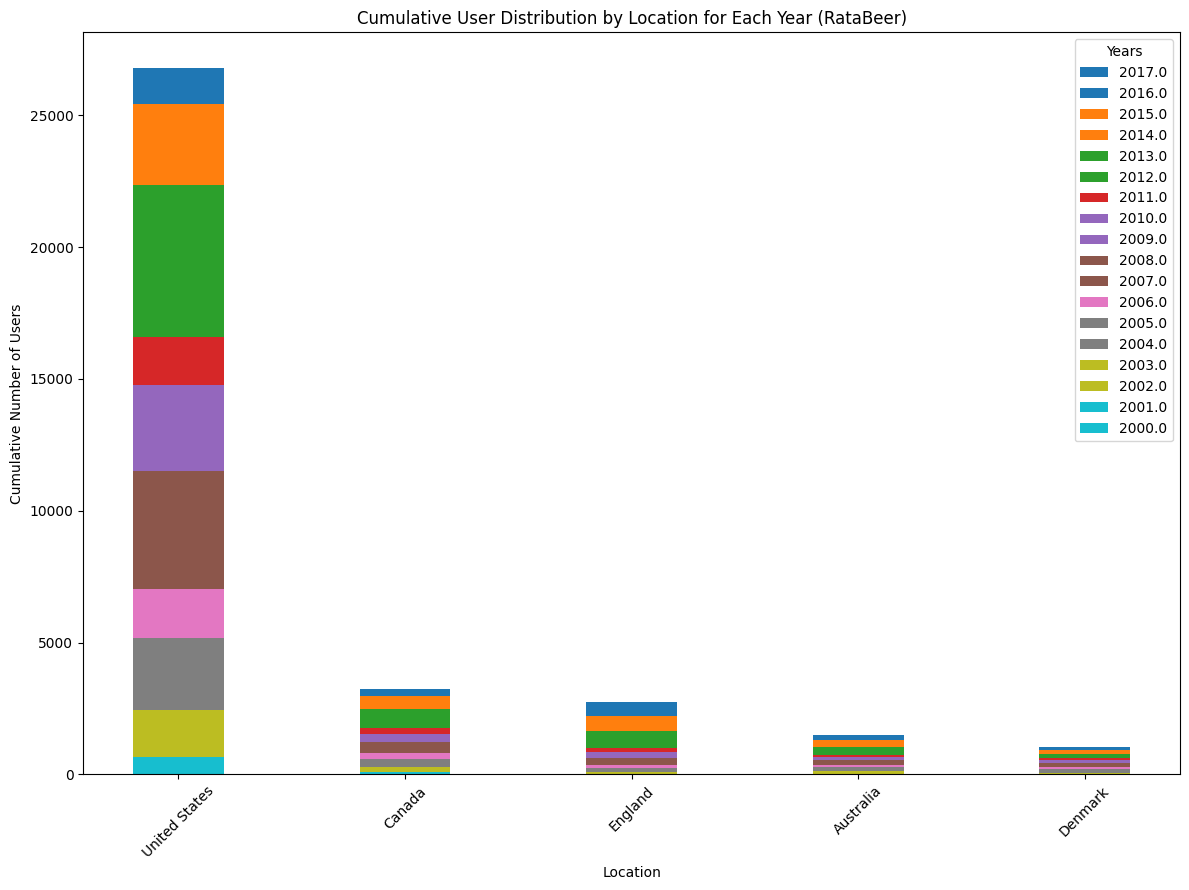

Top 5 locations: ['United States', 'Canada', 'England', 'Australia', 'Germany']


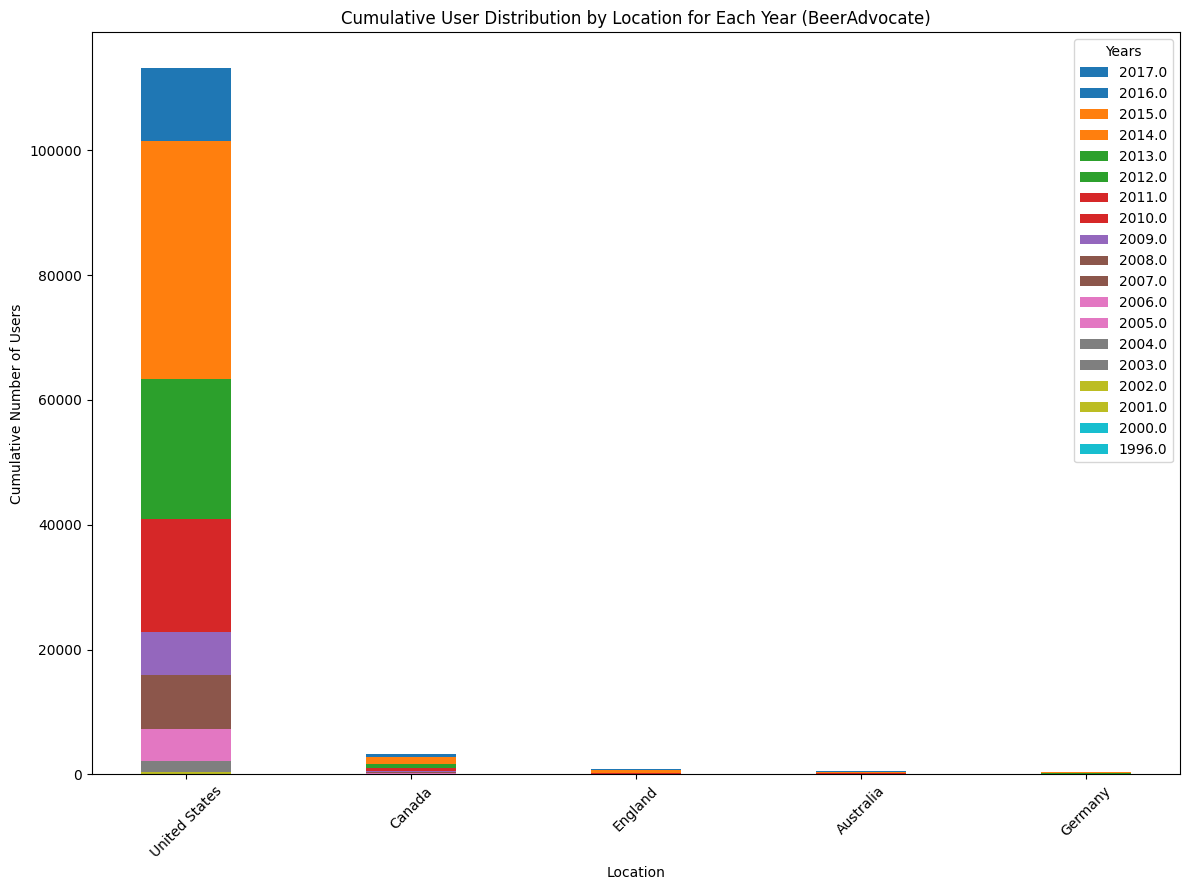

In [59]:
# Static plot allowing me to visualise how membership of review sites has changed over the years for each location (cumulative plot)
n_most_used_location_RB = utils.plot_user_per_location_per_time_cumulative(table_users_RB, 'RataBeer', 5)
n_most_used_location_BA = utils.plot_user_per_location_per_time_cumulative(table_users_BA, 'BeerAdvocate', 5)


In [68]:
from collections import Counter

n_most_used_location_BA = utils.find_top_n(table_users_BA, n=7)
n_most_used_location_RB = utils.find_top_n(table_users_RB, n=7)

Top 7 locations: ['United States', 'Canada', 'England', 'Australia', 'Germany', 'Sweden', 'Netherlands']
Top 7 locations: ['United States', 'Canada', 'Australia', 'Denmark', 'England', 'Netherlands', 'Belgium']


Let us identify and visualise what has been the change over time of the n locations where the site is most used. As we can see, in the US the site has a whirlwind growth, while in other continents the growth is existing but less pronounced. 
This leads us to reflect on the need to conduct a separate analysis for states within the US to investigate whether there are differences within US states or whether preferences are shared across the continent

C:\Users\chiar\AppData\Local\Temp\ipykernel_23100\2499495402.py:1: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



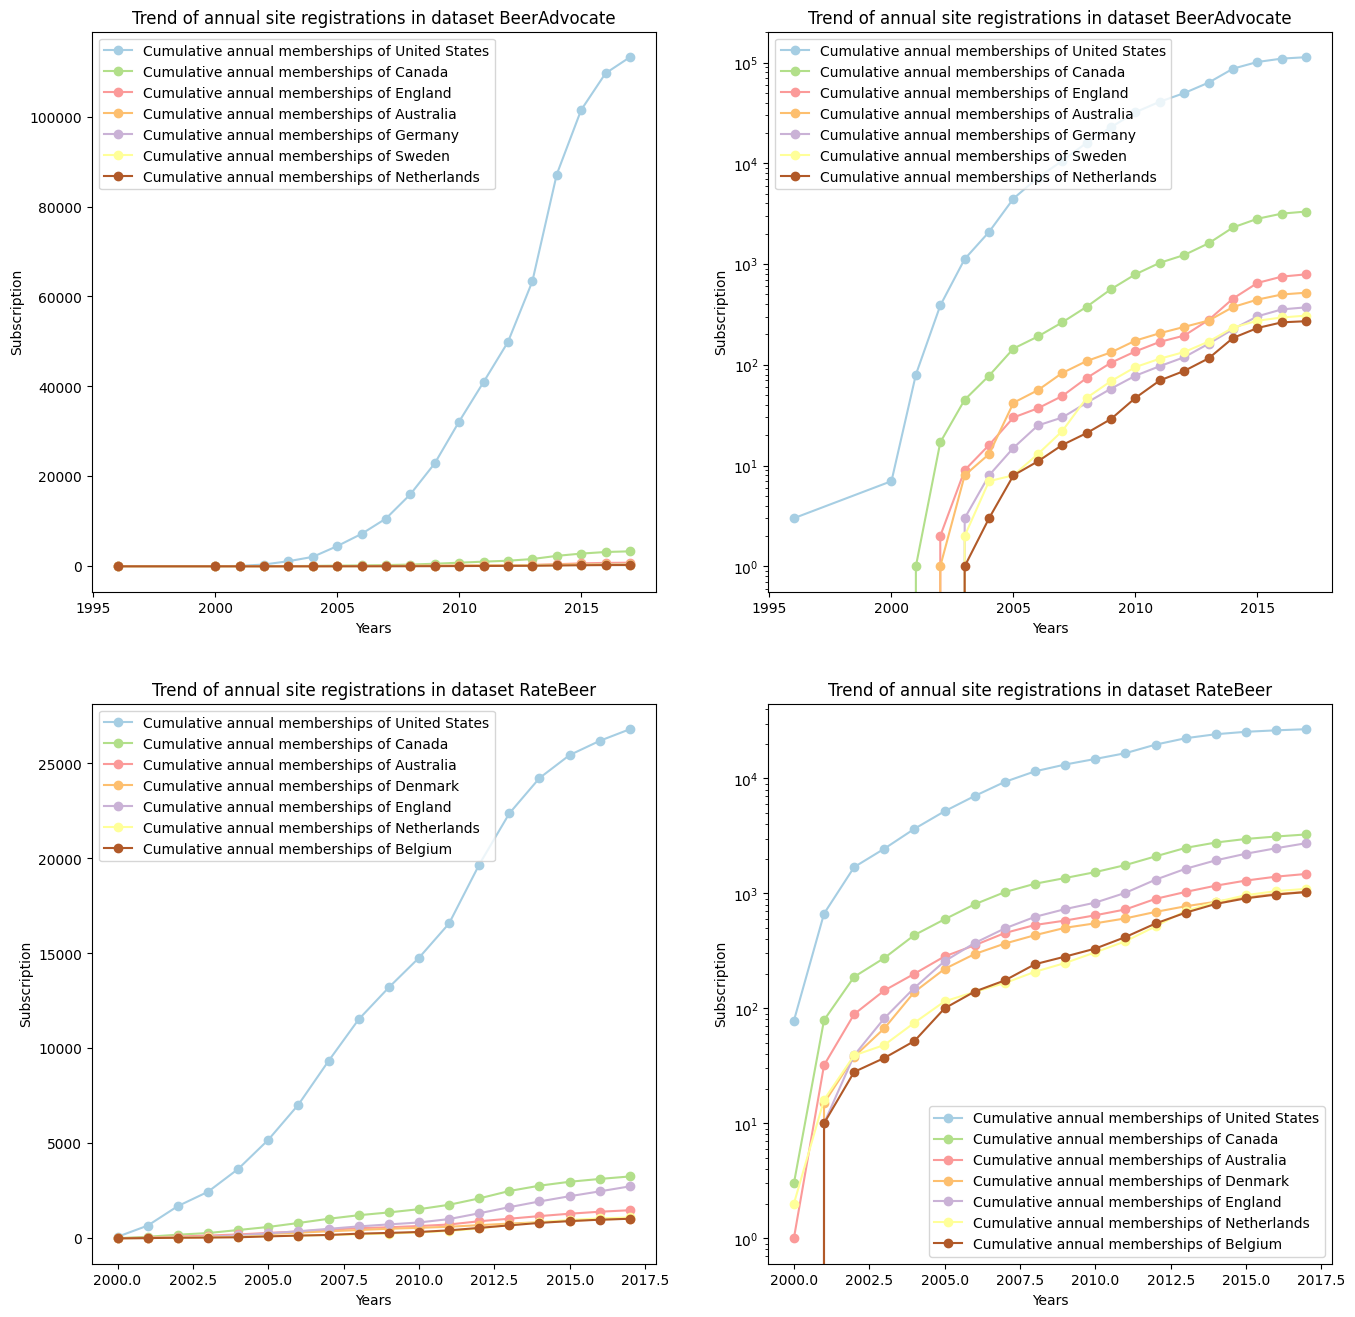

In [66]:
colors = plt.cm.get_cmap('Paired', len(n_most_used_location_BA))  # Using 'Paired' colormap 
fig , ax = plt.subplots(2,2, figsize=(16,16))
plt.sca(ax[0, 0])
for i,loc in enumerate(n_most_used_location_BA):
    utils.time_machine(table_users_BA, 'BeerAdvocate', loc, colors(i), scale ='linear')

plt.sca(ax[0, 1])
for i,loc in enumerate(n_most_used_location_BA):
    utils.time_machine(table_users_BA, 'BeerAdvocate', loc, colors(i), scale ='log')

plt.sca(ax[1, 0])
for i,loc in enumerate(n_most_used_location_RB):
    utils.time_machine(table_users_RB, 'RateBeer', loc, colors(i), scale ='linear')

plt.sca(ax[1, 1])
for i,loc in enumerate(n_most_used_location_RB):
    utils.time_machine(table_users_RB, 'RateBeer', loc, colors(i), scale ='log')



Observing the following chart, it’s clear that over the years, the contribution of different countries to beer ratings changes drastically. Therefore, it’s important to consider this aspect when we later evaluate global preferences.

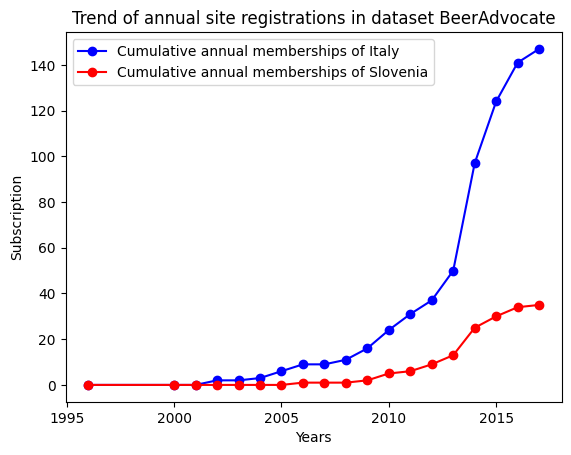

In [70]:
utils.time_machine(table_users_BA, 'BeerAdvocate', 'Italy')
utils.time_machine(table_users_BA, 'BeerAdvocate', 'Slovenia', 'r')

## BREWER ANALYSIS
### Distribution of breweres all over the World 
Goal: Understand the geographic and demographic distribution of breweries bases within each dataset to assess their representativeness.

Approach: In this part, we want to analyse the **geographical distribution** of **breweries** in order to better understand user distribution data.Consider weighting techniques to ensure overrepresented areas do not skew global findings.

In [71]:
#breweries_RB.head()
breweries_BA.head()

,id,location,brewery_name,nbr_beers,location_region,US,Canada,UK
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5,NaN,False,False,False
1,39913,Kyrgyzstan,Arpa (АРПА),1,NaN,False,False,False
2,39914,Kyrgyzstan,Bear Beer,4,NaN,False,False,False
3,39915,Kyrgyzstan,Blonder Pub,4,NaN,False,False,False
4,39916,Kyrgyzstan,Kellers Bier,2,NaN,False,False,False


In [72]:
import scr.utils
importlib.reload(scr.utils)
dist_RB = utils.loc_distribution(breweries_RB, 'RateBeer', 'location')
dist_BA = utils.loc_distribution(breweries_BA, 'BeerAdvocate', 'location')
dist_RB_US = utils.loc_distribution(breweries_RB[breweries_RB['US']==True], 'RateBeer_US', 'location_region')
dist_BA_US = utils.loc_distribution(breweries_BA[breweries_BA['US']==True], 'BeerAdvocate_US', 'location_region') 

Dataset: RateBeer
- Number of unique "location" value in the dataset: 217
Dataset: BeerAdvocate
- Number of unique "location" value in the dataset: 201
Dataset: RateBeer_US
- Number of unique "location" value in the dataset: 1
Dataset: BeerAdvocate_US
- Number of unique "location" value in the dataset: 1


In [73]:
# Let's take a look on the top_boundaries of our dataset
# We can notice that the max number of beer for brewer in BA dataset is way highter than in RB
print('Max number of beer for BA:', breweries_BA['nbr_beers'].max(),'\nMax number of beer for RB:',breweries_RB['nbr_beers'].max())
#breweries_BA[breweries_BA['nbr_beers']==max(breweries_BA['nbr_beers'])].groupby('location').size()

Max number of beer for BA: 1196 
Max number of beer for RB: 295


C:\Users\chiar\OneDrive\Documenti\EPFL-DH\Applied_Data_Analysis\P2\ada-2024-project-mediterranean\scr\utils.py:295: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



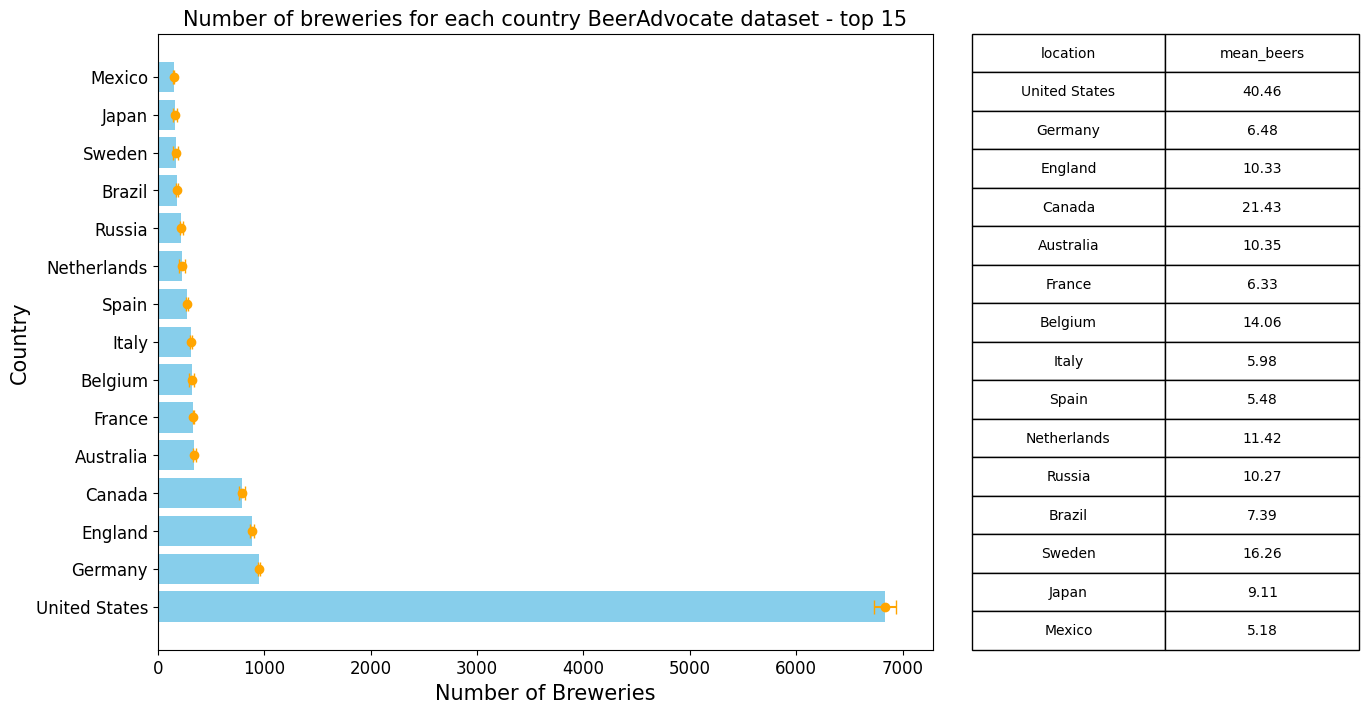

In [74]:
#utils.plotting_dist(dist_RB,'RateBeer',n=15)
utils.plotting_dist(dist_BA,'BeerAdvocate',n=15)

As we can see from the chart and especially from the table on the side, the average number of beers per brewery varies significantly even between the first and second place!

In [75]:
dist_BA_US.head()

,location_region,brewery_count,total_beers,mean_beers,std_beers,median_beers
0,Alabama,41,791,19.292683,20.296852,14.0
1,Alaska,37,1178,31.837838,38.763896,20.0
2,Arizona,107,7495,70.046729,224.404595,19.0
3,Arkansas,30,502,16.733333,12.156830,13.0
4,California,863,35587,41.236385,107.162451,15.0


C:\Users\chiar\OneDrive\Documenti\EPFL-DH\Applied_Data_Analysis\P2\ada-2024-project-mediterranean\scr\utils.py:295: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



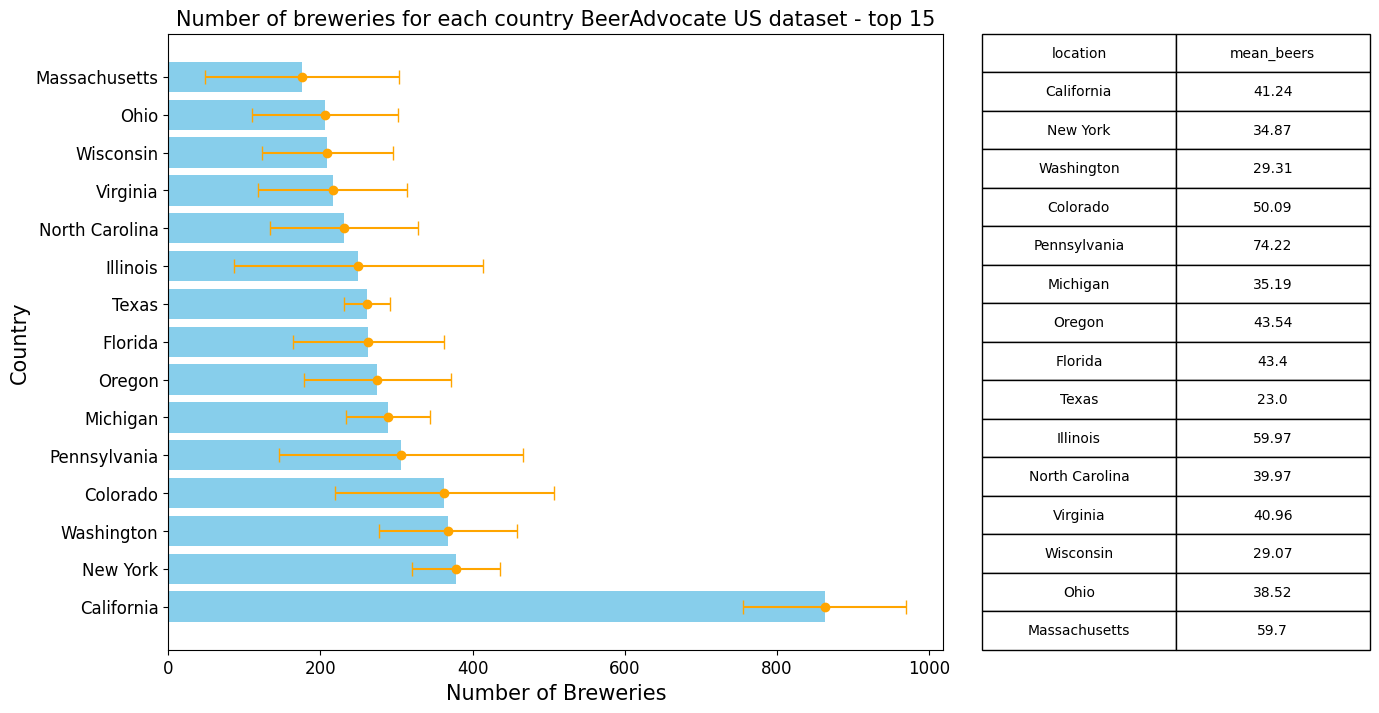

In [76]:
# Rename the ‘location_region’ column to ‘location’ for both DataFrames
dist_RB_US = dist_RB_US.rename(columns={'location_region': 'location'})
dist_BA_US = dist_BA_US.rename(columns={'location_region': 'location'})

utils.plotting_dist(dist_BA_US,'BeerAdvocate US',n=15)

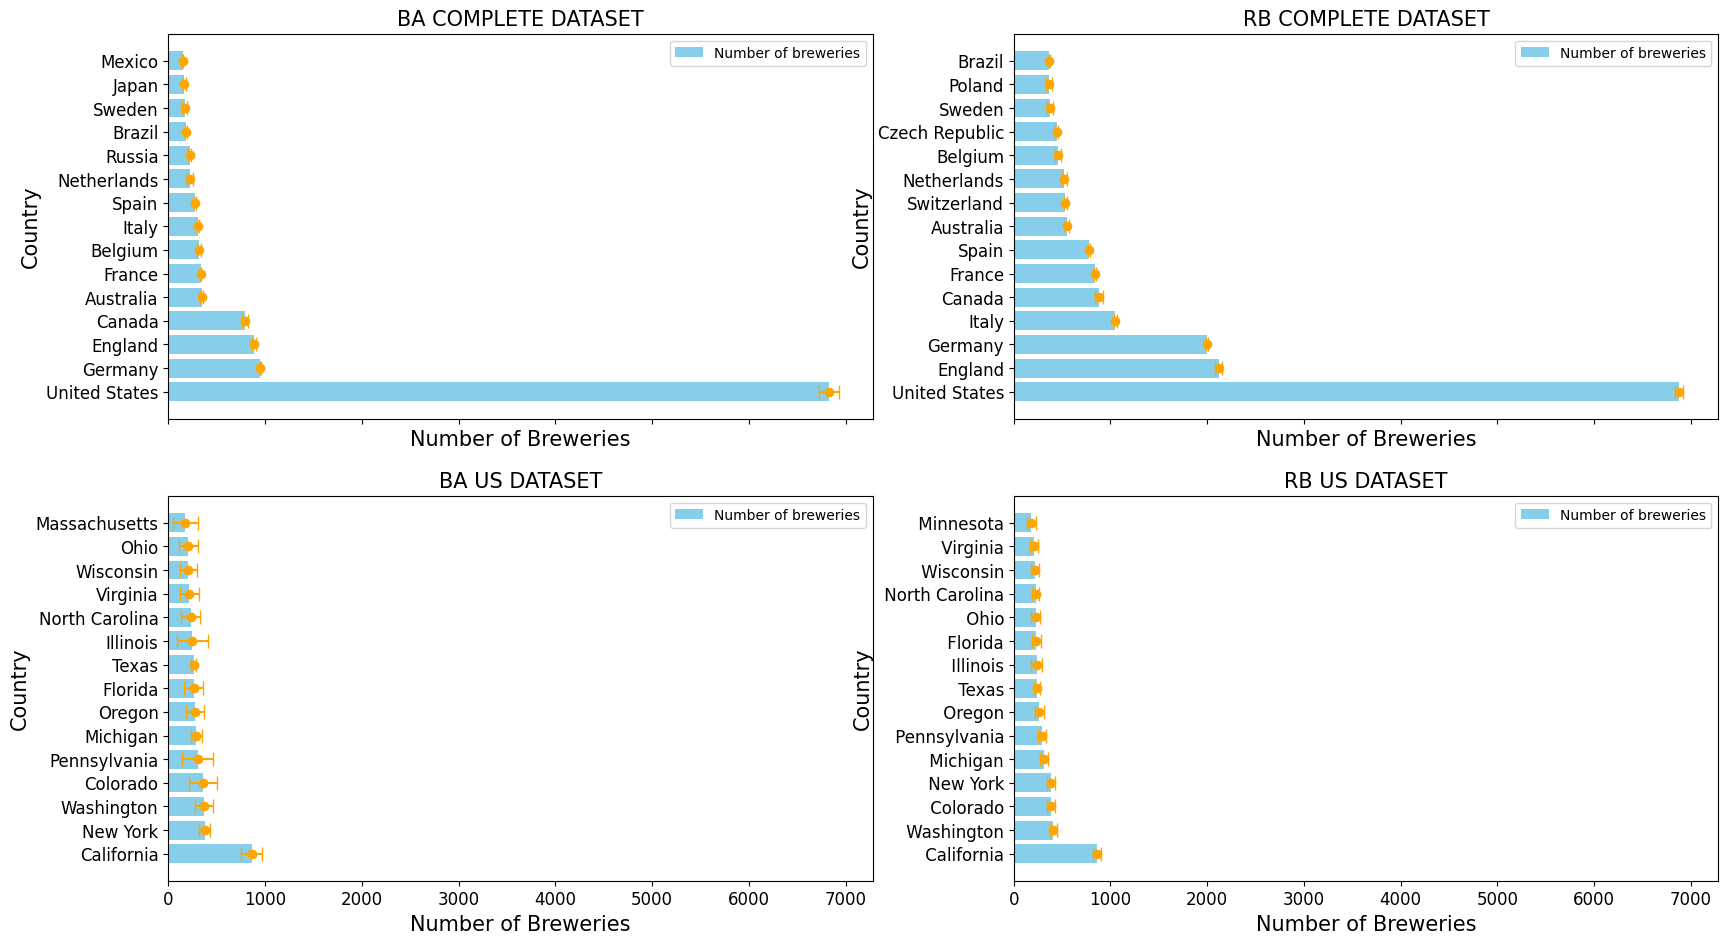

In [77]:
utils.comparing_plot(dist_BA, dist_RB, dist_BA_US, dist_RB_US)

This chart is highly informative as it allows us to see how breweries are distributed in both datasets, both globally and within the US (which clearly constitutes the majority).

## BEER ANALYSIS
### Top-Rated Beers per Year & Global Favorites
**Goal**: Identify annual and global top-ranked beers across continents.

**Approach**: Extract yearly scores from each dataset, normalizing ratings to adjust for different scoring systems, and use ranking algorithms to determine yearly favorites. Evaluate consistency across datasets to ensure merged rankings maintain integrity.

In [78]:
#beer_RB.head()
beer_BA.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,location_region,US,UK,Canada
0,142544,Régab,37262,Societe des Brasseries du Gabon (SOBRAGA),Euro Pale Lager,1,1,2.88,NaN,NaN,4.5,2.880000,NaN,0,NaN,Gabon,NaN,False,False,False
1,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,4,4,3.85,NaN,NaN,4.5,3.845000,NaN,0,NaN,Northern Ireland,NaN,False,False,False
2,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,75,59,3.45,80.0,80.0,4.8,3.439867,-0.649167,59,3.504068,Northern Ireland,NaN,False,False,False
3,20841,St. Patrick's Ale,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,8,6,3.86,NaN,NaN,6.0,3.888750,0.093110,6,3.768333,Northern Ireland,NaN,False,False,False
4,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,English Bitter,64,48,3.56,82.0,90.0,4.2,3.556094,-0.478579,48,3.580417,Northern Ireland,NaN,False,False,False
